In [47]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.colors import SymLogNorm, LogNorm

import numpy as np
from lmfit import Parameters

from ctisim import ITL_AMP_GEOM
from ctisim.fitting import SimulatedModel

num_transfers = ITL_AMP_GEOM.nx + ITL_AMP_GEOM.prescan_width
signals = np.logspace(2, np.log10(150000), 200)

start = 0
stop = 15

In [66]:
runs= []

## Run 1: Just CTI

params = Parameters()
params.add('ctiexp', value=np.log10(1.E-6), vary=False)
run1 = SimulatedModel.model_results(params,signals, num_transfers, ITL_AMP_GEOM, start=start, stop=stop)
runs.append(run1)

## Run 2: Just CTI + electronics

params = Parameters()
params.add('ctiexp', value=np.log10(1.E-6), vary=False)
params.add('driftscale', value=0.0002, min=0., max=0.001, vary=False)
params.add('decaytime', value=2.75, min=0.1, max=4.0, vary=False)
run2 = SimulatedModel.model_results(params,signals, num_transfers, ITL_AMP_GEOM, start=start, stop=stop)
runs.append(run2)

## Run 3: Just CTI + linear trap

params = Parameters()
params.add('ctiexp', value=np.log10(1.E-6), vary=False)
params.add('trapsize', value=4., vary=False)
params.add('scaling', value=0.08, vary=False)
params.add('emissiontime', value=0.35, vary=False)
#params.add('driftscale', value=0.0002, min=0., max=0.001, vary=False)
#params.add('decaytime', value=2.75, min=0.1, max=4.0, vary=False)
run3 = SimulatedModel.model_results(params, signals, num_transfers, ITL_AMP_GEOM, start=start, stop=stop, trap_type='linear')
runs.append(run3)

## Run 4: Just CTI + logistic trap

params = Parameters()
params.add('ctiexp', value=np.log10(1.E-6), vary=False)
params.add('trapsize', value=100., vary=False)
params.add('k', value=0.0005, vary=False)
params.add('f0', value=30000., vary=False)
params.add('emissiontime', value=0.35, vary=False)
#params.add('driftscale', value=0.0002, min=0., max=0.001, vary=False)
#params.add('decaytime', value=2.75, min=0.1, max=4.0, vary=False)
run4 = SimulatedModel.model_results(params, signals, num_transfers, ITL_AMP_GEOM, start=start, stop=stop, trap_type='logistic')
runs.append(run4)

In [1]:
4/0.08

50.0

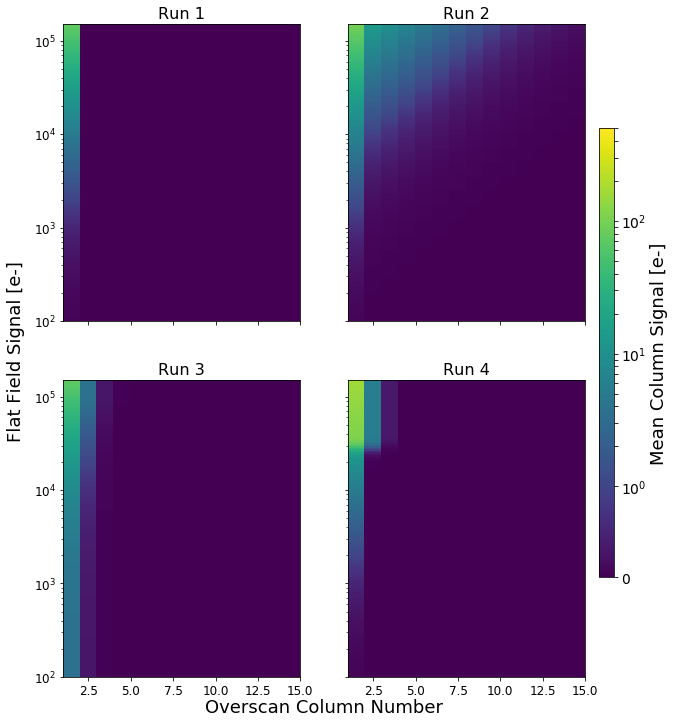

In [81]:
fig, axes = plt.subplots(2, 2, figsize=(10, 12), sharey=True, sharex=True)
axes = axes.flatten()

for i in range(len(runs)):

    ## Setting up PColor plot
    vmin = 0.0
    vmax = 500.
    y=signals
    x=np.arange(1, stop+1)
    X,Y=np.meshgrid(x, y)

    im = axes[i].pcolor(X, Y, runs[i][:, 1:], 
                        norm=SymLogNorm(1.0), vmin=vmin, vmax=vmax)
    axes[i].set_yscale('log')
    axes[i].set_ylim(bottom=100, top=150000.)
    axes[i].tick_params(axis='both', which='major', labelsize=12)
    axes[i].set_title('Run {0}'.format(i+1), fontsize=16)
    
fig.subplots_adjust(right=0.85)
cbar_ax = fig.add_axes([0.87, 0.24, 0.02, 0.52])
cbar= fig.colorbar(im, cax=cbar_ax)
cbar.set_label('Mean Column Signal [e-]', fontsize=18)
cbar.ax.tick_params(labelsize=14)
    
fig.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none', top=False, bottom=False, 
                left=False, right=False)
plt.xlabel('Overscan Column Number', fontsize=18)
plt.ylabel('Flat Field Signal [e-]', fontsize=18, labelpad=15)
plt.savefig('sim_runs_serial_eper.png')

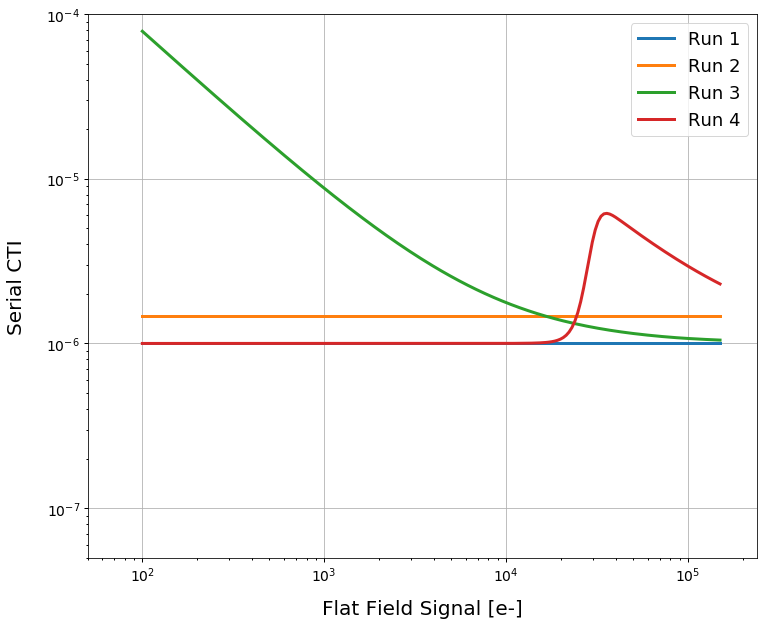

In [82]:
fig, ax = plt.subplots(1, 1, figsize=(12, 10))

for i in range(len(runs)):

    run = runs[i]
    lastpixel = run[:, 0]
    overscan1 = run[:, 1]
    overscan2 = run[:, 2]
    cti = (overscan1+overscan2)/(num_transfers*lastpixel)

    ax.plot(signals, cti, label='Run {0}'.format(i+1), linewidth=3)

ax.set_ylim(bottom=5E-8, top=1E-4)
ax.set_xlim(left=50.0, right=240000.)
ax.set_xscale('log')
ax.set_yscale('log')
ax.grid(which='major', axis='both')
ax.tick_params(axis='x', labelsize=14)
ax.tick_params(axis='y', labelsize=14)
ax.tick_params(axis='both', which='major', length=4, width=1)
ax.tick_params(axis='both', which='minor', length=2, width=1)
    
ax.set_ylabel('Serial CTI', fontsize=20, labelpad=20)
ax.set_xlabel('Flat Field Signal [e-]', fontsize=20, labelpad=15)
ax.legend(fontsize=18)
plt.savefig('sim_runs_cti.png')